In [14]:
import pandas as pd
from sklearn import datasets, cluster, metrics
from matplotlib import pyplot as plt
import numpy as np
iris = datasets.load_iris()

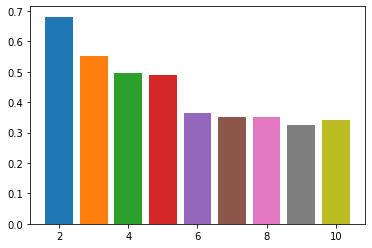

In [6]:
def get_kscore(k):
  km = cluster.KMeans(n_clusters=k) #看你的資料要分幾種結果(iris是三種)
  km.fit(iris.data)
  return metrics.silhouette_score(iris.data, km.labels_) #算出來的數值越大分類得越好)

for k in range(2, 11):
  plt.bar(k, get_kscore(k))


In [ ]:
ac = cluster.AgglomerativeClustering(n_clusters=3)
ac.fit(iris.data)
ac.labels_

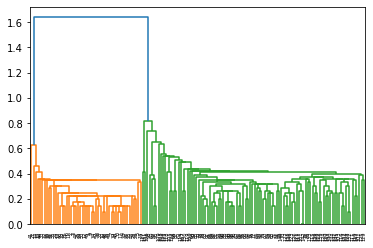

In [12]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(iris.data, method = "complete") #single or complete
hierarchy.dendrogram(Z)
plt.show()

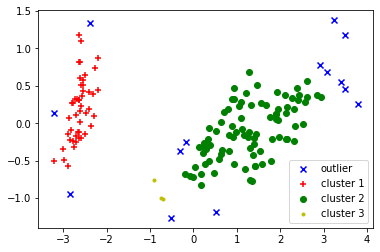

In [40]:
from sklearn import decomposition as dc
pca = dc.PCA(2)
irData = pca.fit_transform(iris.data)

def draw(d):
  for point in d:
    if point[2] == -1:
      c0 = plt.scatter(point[0], point[1], c='b', marker = 'x')
    elif point[2] == 0:
      c1 = plt.scatter(point[0], point[1], c='r', marker = '+')
    elif point[2] == 1:
      c2 = plt.scatter(point[0], point[1], c='g', marker = 'o')
    else:
      c3 = plt.scatter(point[0], point[1], c='y', marker = '.')
  plt.legend([c0, c1, c2, c3], ['outlier', 'cluster 1', 'cluster 2', 'cluster 3'])

ds = cluster.DBSCAN(eps=0.3, min_samples=3) #esp = radius(半徑越小越多群), min_samples = 圈圈內有幾個樣本(數字越大群越少)
ds.fit(irData) #ds.labels_ -1 is outlier
labels_ = [[x] for x in ds.labels_]

datatodraw = np.concatenate((irData, labels_), axis = 1)
draw(datatodraw)
